___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
dff=pd.read_csv("solder_female_Public.csv")
dfm=pd.read_csv("solder_male_public.csv",encoding="latin-1")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
dff.shape,dfm.shape

((1986, 108), (4082, 108))

In [4]:
df=pd.concat([dfm,dff],axis=0,ignore_index=True)

<IPython.core.display.Javascript object>

In [5]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [6]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

## Explore Data

In [7]:
df.head().T

,0,1,2,3,4
subjectid,10027.0,10032.0,10033.0,10092.0,10093.0
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [8]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
count,4082.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,1986.000000
mean,20003.370897,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.76120

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [10]:
df.nunique()

subjectid                         4082
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

In [11]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference', 'SubjectId'], dtype='object', length=109)

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [13]:
df=df.drop_duplicates()

In [14]:
for column in df.select_dtypes("object"):                 # Check unique values for object type columns
    print(f"{column:25} column has {df[column].nunique():5}  unique values.")

Gender                    column has     2  unique values.
Date                      column has   253  unique values.
Installation              column has    12  unique values.
Component                 column has     3  unique values.
Branch                    column has     3  unique values.
PrimaryMOS                column has   285  unique values.
SubjectsBirthLocation     column has   152  unique values.
Ethnicity                 column has   209  unique values.
WritingPreference         column has     3  unique values.


In [15]:
df.drop([2406],axis=0,inplace=True)#only one feature one speciality

In [16]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [17]:
y=df["DODRace"].map({1: "White",
                                 2: "Black",
                                 3: "Hispanic",
                                 4: "Asian",
                                 5: "Native American",
                                 6: "Pacific Islander",
                                 8: "Other"})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Pacific Islander'),
  Text(6, 0, 'Other')])

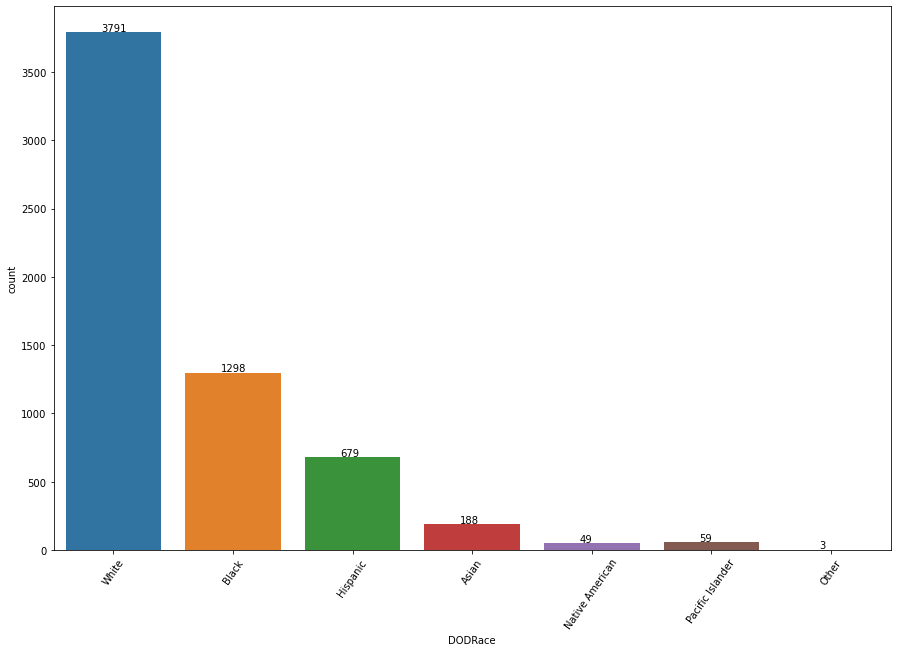

In [18]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y) 
for i in ax.patches:
    ax.annotate((i.get_height()), (i.get_x()+0.3,i.get_height()+8)); #target control
plt.xticks(rotation=55) 

In [19]:
df.drop(df[df.DODRace.map(lambda x: (x == 4) or (x == 5) or (x == 6) or (x == 8))].index,axis=0,inplace=True)
#I dropped other unimportance values

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
y=df["DODRace"].map({1: "White",
                     2: "Black",
                     3: "Hispanic"})

In [22]:
y.unique()

array(['White', 'Black', 'Hispanic'], dtype=object)

In [23]:
len(y)

5768

In [24]:
drop_list =[]
for col in df:
    if df[col].isnull().sum()>1800:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)

        
drop_list
#

subjectid = 1870
Ethnicity = 4643
SubjectId = 3898


['subjectid', 'Ethnicity', 'SubjectId']

In [25]:
df.drop(drop_list, axis=1, inplace=True)

In [26]:
df.corr()["DODRace"]

abdominalextensiondepthsitting   -0.031978
acromialheight                   -0.217356
acromionradialelength            -0.158579
anklecircumference               -0.157731
axillaheight                     -0.205541
balloffootcircumference          -0.111236
balloffootlength                 -0.059829
biacromialbreadth                -0.113686
bicepscircumferenceflexed        -0.031438
bicristalbreadth                 -0.203887
bideltoidbreadth                 -0.070193
bimalleolarbreadth               -0.107230
bitragionchinarc                  0.083366
bitragionsubmandibulararc        -0.024162
bizygomaticbreadth                0.032520
buttockcircumference             -0.025159
buttockdepth                     -0.001389
buttockheight                    -0.098902
buttockkneelength                -0.066737
buttockpopliteallength           -0.043788
calfcircumference                -0.091946
cervicaleheight                  -0.215672
chestbreadth                     -0.155213
chestcircum

In [27]:
df.info(verbose=True)
df1=df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 106 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

In [28]:
df1.shape

(5768, 106)

In [29]:
df1.isnull().sum().any()

False

In [30]:
df1.SubjectsBirthLocation.nunique()

136

In [31]:
df1.PrimaryMOS.nunique()

280

In [32]:
df1.drop(["PrimaryMOS","Date","Installation","Component","Branch","WritingPreference","Heightin","Weightlbs"],axis=1,inplace=True)
#this columns have object values for not realation with target 

In [33]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5768 non-null   int64 
 1   acromialheight                  5768 non-null   int64 
 2   acromionradialelength           5768 non-null   int64 
 3   anklecircumference              5768 non-null   int64 
 4   axillaheight                    5768 non-null   int64 
 5   balloffootcircumference         5768 non-null   int64 
 6   balloffootlength                5768 non-null   int64 
 7   biacromialbreadth               5768 non-null   int64 
 8   bicepscircumferenceflexed       5768 non-null   int64 
 9   bicristalbreadth                5768 non-null   int64 
 10  bideltoidbreadth                5768 non-null   int64 
 11  bimalleolarbreadth              5768 non-null   int64 
 12  bitragionchinarc                5768 non-null   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='DODRace'>

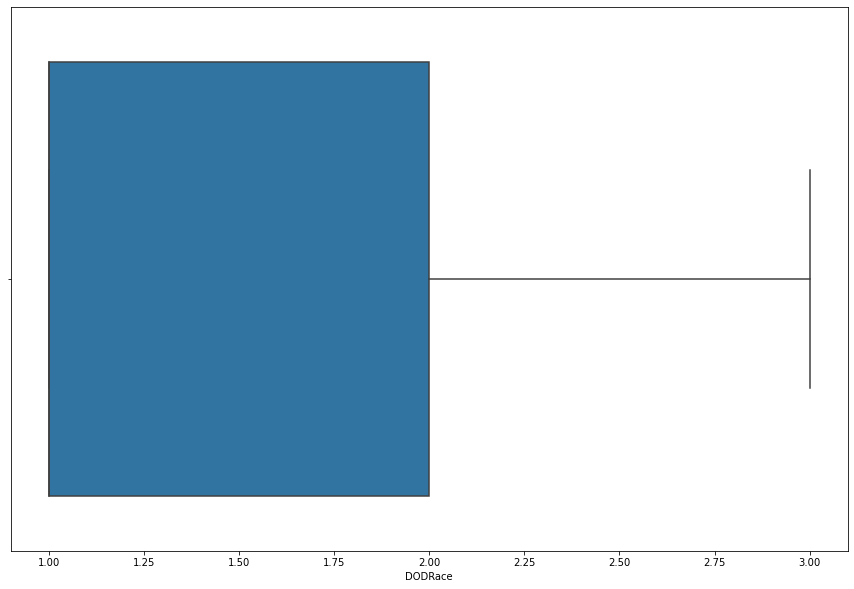

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(df.DODRace)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='DODRace', ylabel='Age'>

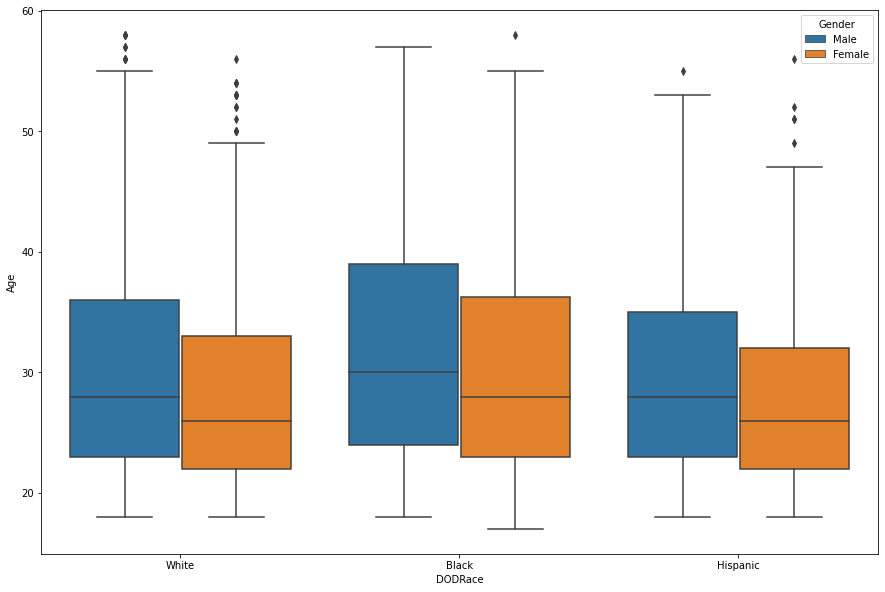

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(x=y,y="Age",hue="Gender",data=df)

In [36]:
df2=pd.get_dummies(df1)

<IPython.core.display.Javascript object>

In [37]:
df2.drop(["DODRace"],axis=1,inplace=True)

In [38]:
df1.drop(["DODRace"],axis=1,inplace=True)

In [39]:
df2.shape #my dummy features 

(5768, 233)

In [40]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 233 columns):
 #    Column                                        Dtype
---   ------                                        -----
 0    abdominalextensiondepthsitting                int64
 1    acromialheight                                int64
 2    acromionradialelength                         int64
 3    anklecircumference                            int64
 4    axillaheight                                  int64
 5    balloffootcircumference                       int64
 6    balloffootlength                              int64
 7    biacromialbreadth                             int64
 8    bicepscircumferenceflexed                     int64
 9    bicristalbreadth                              int64
 10   bideltoidbreadth                              int64
 11   bimalleolarbreadth                            int64
 12   bitragionchinarc                              int64
 13   bitragionsubmand

In [41]:
df2.isnull().sum().any()

False

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [42]:
X=df2

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [44]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4614, 233)
Train target shape   :  (4614,)
Test features shape  :  (1154, 233)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [46]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)
#mutlaka pipline grid search ve cross validation yaparken kuruyoruz leak olmasın diye

In [47]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)
#blacklerin vücut ölçüleri daha iyi özelliklere sahip güzel bi score
#hispanic için scorelar dengeli olanları görüyoruz

Test_Set
[[238  15   7]
 [  5 111  20]
 [ 22  90 646]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   41   29]
 [  18  453   72]
 [  60  361 2612]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.87      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.90      0.87      0.88      4614



In [48]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}
#amaç hispaniğin scoreları olduğu için class weight balance vermeden önce daha kötüydü

In [49]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
#cross validate
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.607401
test_precision_Hispanic    0.495691
test_recall_Hispanic       0.788013
dtype: float64

### Logistic Model GridsearchCV

In [50]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])
#hispaniclerin recallarını yükseltecek şekilde en iyi parametreleri bul

In [51]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [52]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [53]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [54]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [55]:
log_model_grid.best_score_

0.7882602786272512

In [56]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  15   7]
 [  5 111  20]
 [ 22  90 646]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 968   41   29]
 [  18  453   72]
 [  60  361 2612]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.87      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.90      0.87      0.88      4614



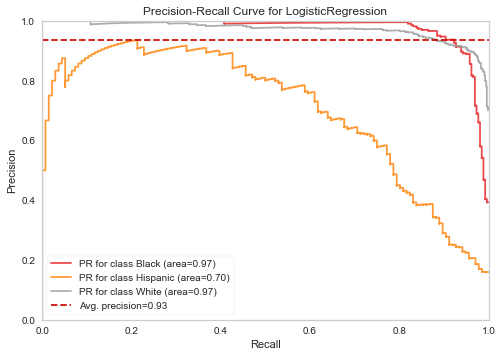

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();
#hispaniclerin model performansı %73

In [58]:
viz.score_#["Hispanic"]

{'Black': 0.9745104304830164,
 'Hispanic': 0.7014542398548533,
 'White': 0.9713266685150448,
 'micro': 0.9347129339874837}

In [59]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"] #bi değişkene atamak istiyorum
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])#multiclasslarda average yazılması istenir labels Hispanic 
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [60]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [61]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[243   9   8]
 [  5 110  21]
 [ 17 115 626]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       260
    Hispanic       0.47      0.81      0.59       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   40   41]
 [  24  457   62]
 [  52  420 2561]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.84      0.63       543
       White       0.96      0.84      0.90      3033

    accuracy                           0.86      4614
   macro avg       0.80      0.87      0.82      4614
weighted avg       0.90      0.86      0.87      4614



In [62]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] #cv ile scorelarımızı teyit ediyoruz

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.574568
test_precision_Hispanic    0.460768
test_recall_Hispanic       0.765892
dtype: float64

###  SVC Model GridsearchCV

In [63]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [64]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [65]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [66]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [67]:
svm_model_grid.best_score_

0.7790010193679919

In [68]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 113  18]
 [ 21  96 641]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.51      0.83      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 969   35   34]
 [  17  464   62]
 [  51  371 2611]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.85      0.66       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.88      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.91      0.88      0.89      4614



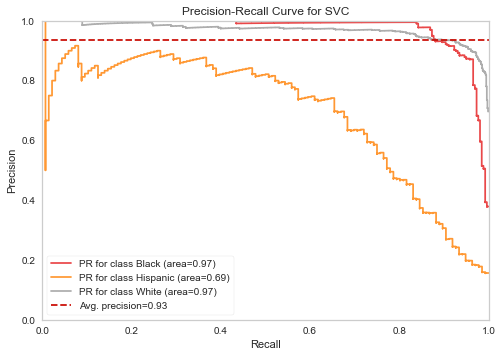

In [69]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [70]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"]) #atadık karşılaştırmak için

## 3. RF

In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
X2=df1

In [73]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [74]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])  #encoder ile dönüştürüyoruz cat verileri
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,SubjectNumericRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,1,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,2,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,1,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,2,21


In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [76]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4614, 97)
Train target shape   :  (4614,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [77]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [78]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [79]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2) #RF model harika toparladı

Test_Set
[[242   7  11]
 [ 17  86  33]
 [  9   9 740]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.92       260
    Hispanic       0.84      0.63      0.72       136
       White       0.94      0.98      0.96       758

    accuracy                           0.93      1154
   macro avg       0.90      0.85      0.87      1154
weighted avg       0.92      0.93      0.92      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [80]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]  #model are expected

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.725543
test_precision_Hispanic    0.861441
test_recall_Hispanic       0.627980
dtype: float64

### RF Model GridsearchCV

In [81]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} 

In [82]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [83]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [84]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [85]:
rf_grid_model.best_score_

0.7663098878695209

In [86]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2) #çok işe yarar sonuçlar aldım modeli hep böle classmanlar için
#kullanırım işe yarar bir durum ortaya birazda olsa koymayı başardı denileiblir !!!!!

Test_Set
[[246  11   3]
 [ 17 107  12]
 [ 10  26 722]]
              precision    recall  f1-score   support

       Black       0.90      0.95      0.92       260
    Hispanic       0.74      0.79      0.76       136
       White       0.98      0.95      0.97       758

    accuracy                           0.93      1154
   macro avg       0.87      0.90      0.88      1154
weighted avg       0.93      0.93      0.93      1154


Train_Set
[[1037    1    0]
 [   0  543    0]
 [   1   51 2981]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       0.91      1.00      0.95       543
       White       1.00      0.98      0.99      3033

    accuracy                           0.99      4614
   macro avg       0.97      0.99      0.98      4614
weighted avg       0.99      0.99      0.99      4614



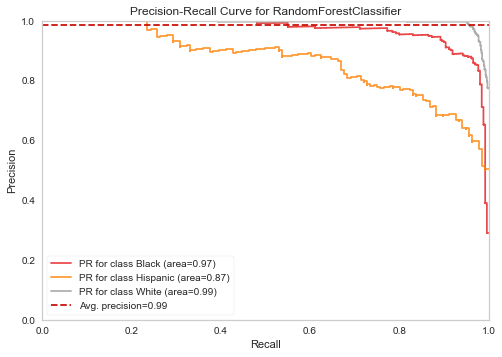

In [87]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [88]:
#87 pred recall aldık böle bi data için solition kısmında rd çuvallamıştı  

In [89]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [90]:
xgb_model = XGBClassifier(random_state=101)

In [91]:
from sklearn.utils import class_weight
#bu fonksiyon var bir hyper parametre yoksa class weight ile dengeli hale getirilebilir
#multi classlarda 
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
#classlarımın sayısına göre y_train2 nin sayılarına göre 
classes_weights

array([0.50708869, 0.50708869, 0.50708869, ..., 0.50708869, 0.50708869,
       0.50708869])

In [92]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)#sample weight karşısına 

[12:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [93]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2) #see the power of XGBoost it makes great for all sv systems 

Test_Set
[[253   3   4]
 [  1 131   4]
 [ 12  14 732]]
              precision    recall  f1-score   support

       Black       0.95      0.97      0.96       260
    Hispanic       0.89      0.96      0.92       136
       White       0.99      0.97      0.98       758

    accuracy                           0.97      1154
   macro avg       0.94      0.97      0.95      1154
weighted avg       0.97      0.97      0.97      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [94]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[12:19:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.909045
test_precision_Hispanic    0.890509
test_recall_Hispanic       0.930101
dtype: float64

[12:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


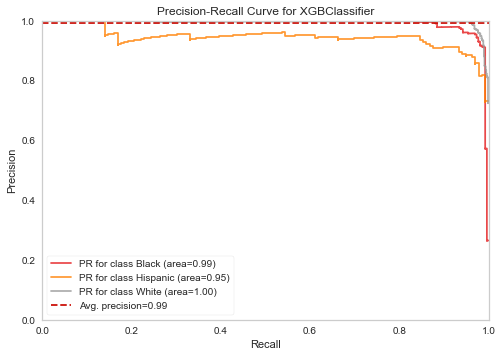

In [95]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [96]:
y_pred = xgb_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

# Comparing Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

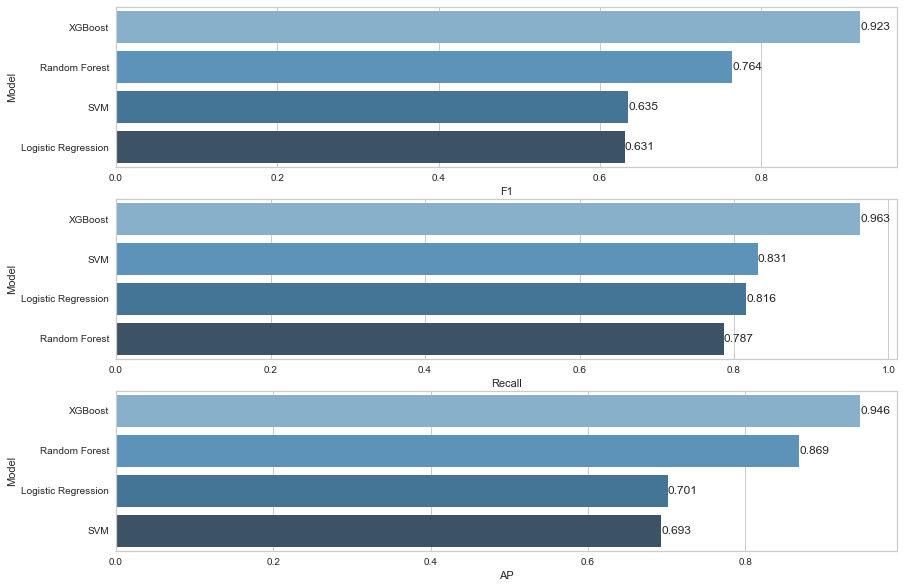

In [97]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [98]:
#XGBoost is best for this data 

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [99]:
#!pip install imblearn

In [100]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [101]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})
#hangi classsın ne kadar arttırılmasını yada azaltılmasını istiyorsak 

In [102]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train) 
#over ile çalıştırırsak hepsini 3034 e çekiyor
#lakin under ile çalıştırırsak 1200 e çeker 
#gözlem sayısının arttırılması sadece train setinin sayısna olur yani test setinin sayısını arttırmayız 

In [103]:
y_resampled_over.value_counts()

White       3033
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [104]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [105]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [106]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = Pipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [107]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [108]:
y_train.value_counts()

White       3033
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [109]:
from sklearn.metrics import matthews_corrcoef   ###smote is greaat

matthews_corrcoef(y_test, y_pred)

0.9361054934544366

In [110]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.9356544604025191

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [111]:
#!pip install shap

In [112]:
scaler = MinMaxScaler()  #pipline kullandığımızda shap hata verir 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)#feature importancce yapacağımız için sclae etmek lazım

In [113]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
#peanlty mutlaka l1 olmalı ridge ile feature selection yapamayız solver saga 
model_shap.fit(X_train_scaled, y_train)
#shape e vereceğimiz modelin en iyi tahmin eden model olması lazım

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [114]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[241  11   8]
 [  5 112  19]
 [ 24  86 648]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.54      0.82      0.65       136
       White       0.96      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.80      0.87      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[ 973   34   31]
 [  20  454   69]
 [  63  355 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.88      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.90      0.88      0.88      4614



In [115]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203#203. gözlem
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])
#classları tahmin ederken hangi featureın ne kadar katkısı var tüm datayı göz önünde bulundurarak 
#daha az gözlem sayısıyla daha iyi olabilir 
#o gözlemi tahmin eden shap_values[0][0] 1. classın hangi featureların ne kadar katkısı var [1][0] 2.class

In [116]:
shap_values

[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -5.57433548e-01,  0.00000000e+00, -6.34298398e-02,
          0.00000000e+00,  0.00000000e+00,  2.89286099e-01,
         -5.86836569e-01,  0.00000000e+00, -9.30131519e-02,
          1.71911131e+00, -8.06955377e-01, -5.65672659e-02,
          0.00000000e+00,  1.59219928e-01,  5.43588899e-01,
          1.11649057e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -3.83446105e-01, -1.14043741e-01,
         -6.19459755e-01, -1.00655250e-01,  0.00000000e+00,
         -3.59065235e-01, -5.54133950e-02,  3.48637863e-02,
         -1.42933542e-01, -5.41698741e-02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  4.40918882e-01, -2.95282845e-01,
          5.11109479e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  5.91552091e-01, -3.04961771e-01,
          3.97887669e-01,  0.00000000e+00,  4.66729262e-01,
          1.54431827e-01, -9.71558662e-0

In [117]:
print(shap_values[0].shape)

(1, 233)


In [118]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: Black


# Shap values for all data

In [119]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)#tüm gözlemlerim için tüm x testi aldık 
#ilk 13 te hispanicleri tahmin eden hiç yok white ve black tesbit ediyor 

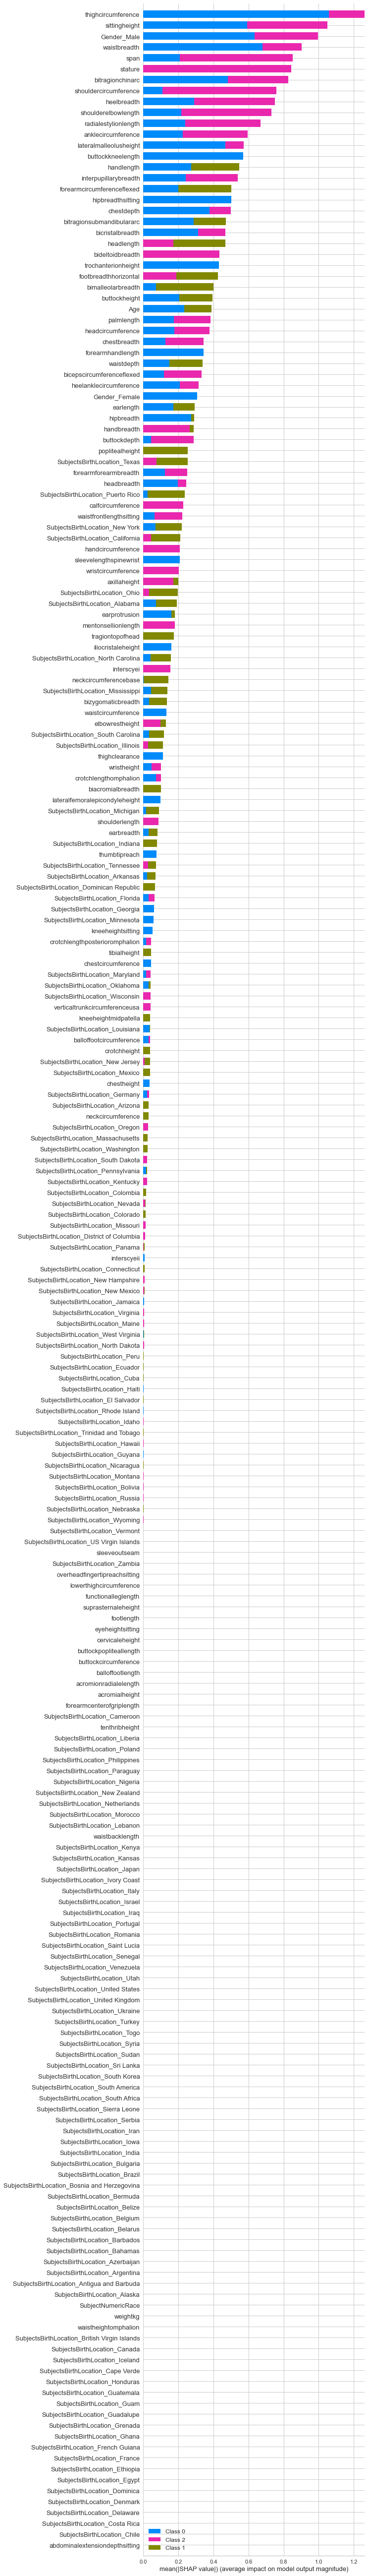

In [120]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [121]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth','tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [122]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)

<IPython.core.display.Javascript object>

In [123]:
X3.shape

(5768, 18)

In [124]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

<IPython.core.display.Javascript object>

In [125]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [126]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [127]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[203  30  27]
 [  9  85  42]
 [103 226 429]]
              precision    recall  f1-score   support

       Black       0.64      0.78      0.71       260
    Hispanic       0.25      0.62      0.36       136
       White       0.86      0.57      0.68       758

    accuracy                           0.62      1154
   macro avg       0.59      0.66      0.58      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 813   86  139]
 [  66  346  131]
 [ 457  827 1749]]
              precision    recall  f1-score   support

       Black       0.61      0.78      0.68      1038
    Hispanic       0.27      0.64      0.38       543
       White       0.87      0.58      0.69      3033

    accuracy                           0.63      4614
   macro avg       0.58      0.67      0.59      4614
weighted avg       0.74      0.63      0.65      4614



In [128]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic           0.371769
test_precision_Hispanic    0.266606
test_recall_Hispanic       0.616936
dtype: float64

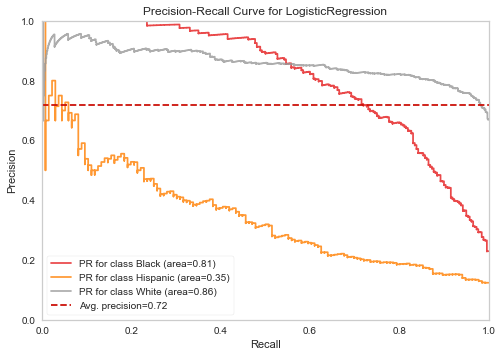

In [129]:
from yellowbrick.classifier import PrecisionRecallCurve                #it doesnt work for  my data
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [130]:
operations = [("XGB",XGBClassifier(random_state=101))]
final_model = Pipeline(steps=operations)

In [131]:
final_model.fit(X, y)

[12:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=Non

In [132]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,Age,Gender_Female,Gender_Male,SubjectsBirthLocation_Alabama,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,S

In [133]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.260749
acromialheight                                  1408.624480
acromionradialelength                            328.071949
anklecircumference                               225.200243
axillaheight                                    1301.897712
balloffootcircumference                          244.407594
balloffootlength                                 195.118065
biacromialbreadth                                399.705097
bicepscircumferenceflexed                        341.662968
bicristalbreadth                                 274.903606
bideltoidbreadth                                 491.454404
bimalleolarbreadth                                72.334605
bitragionchinarc                                 324.959778
bitragionsubmandibulararc                        306.676664
bizygomaticbreadth                               139.529820
buttockcircumference                            1022.069868
buttockdepth                            

In [134]:
final_model.predict(X.loc[[201]])# ne ile eğitildiyse o boyutta ister 

array(['Hispanic'], dtype=object)

In [135]:
y[201]

'Hispanic'

In [136]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred) #gerçek değerler ile tahmin edilen değerler arasındaki 

1.0

In [137]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)#dengesiz veri setleri için bu scoreları kontrol etmeliyiz 

1.0

In [138]:
y.name

'DODRace'

In [139]:
y.name in X

False

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___